<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%AF%BC%E8%AE%BA_Datawhale/%E7%AC%AC%203%20%E7%AB%A0%20%E5%87%BD%E6%95%B0%E6%9E%81%E5%80%BC%E4%B8%8E%E8%A7%84%E5%88%92%E6%A8%A1%E5%9E%8B/Notes_Unit3___3_4_%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92_(scipy_optimize_linprog%EF%BC%8CPuLP)_%2B_PuLP_%E6%B1%82%E8%A7%A3%E9%85%8D%E9%80%81%E9%97%AE%E9%A2%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>第 3 章 函数极值与规划模型 </font>





* <font size=4>3.4 线性规划的 **建模案例** </font>

   * 求解库函数： scipy.optimize.linprog 和 pulp

$~$

>整理自：
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

## 例 3.4 牛奶加工厂 利润最大的 生产计划

**例 3.4**   $~~$一家加工厂使用牛奶生产 A, B 两种奶制品，1 桶牛奶经甲机器加工 12 小时得到 3kg A，也可以经过乙机器 8 小时得到 4kg B。

根据市场需求，生产的 A、B 可以全部出售并且每 kg A 获利 24 元、每 kg B 获利 16 元。

现在该工厂每天获得 **50 桶牛奶**供应，所有工人的**最大劳动时间之和为 480 小时**。

甲机器每天最多加工 100 kg A，乙机器加工不限量。

请你为该工厂设计生产计划，使得**每天的利润最大**。



求解：设每天用于生产奶制品 $A$ 的桶数为 $x_1$, 用于生产奶制品 $B$ 的桶数为 $x_2$。

$\max~~24\times3 · x_1+16\times4 · x_2$

满足：  

$\begin{cases}x_1+x_2\leq50\\
12x_1+8x_2\leq480\\
3x_1\leq100\\
x_1,~~x_2\geq 0\end{cases}$



### 用 scipy.optimize.linprog 求解

转成   scipy.optimize.linprog 要求的形式：

$\color{blue}{\min}~~ - 72x_1 -64x_2$

满足：  

$\begin{cases}x_1+x_2\leq50\\
12x_1+8x_2\leq480\\
3x_1\leq100\\
x_1,~~x_2\geq 0\end{cases}$

In [ ]:
from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-72, -64] # 目标函数的参数系数
A = [[1, 1],
    [12, 8],
    [3, 0]]  #   # 约束中 等式或不等式 的参数系数
b = [50, 480, 100]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*2)
print("目标的最小值：", res.fun)
print("最优参数 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： -3360.0
最优参数 x = [20. 30.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


利润最大的生产计划为：

每天用于生产奶制品 $A$ 的桶数为 20， 用于生产奶制品 $B$ 的桶数为 30，

最大利润为 3360 元。

###  用 PuLP 求解  〔 结果一致 〕




设每天用于生产奶制品 $A$ 的桶数为 $x_1$, 用于生产奶制品 $B$ 的桶数为 $x_2$。

$\max~~24\times3 · x_1+16\times4 · x_2$

满足：  

$\begin{cases}x_1+x_2\leq50\\
12x_1+8x_2\leq480\\
3x_1\leq100\\
x_1,~~x_2\geq 0\end{cases}$

In [ ]:
from pulp import *

prob = LpProblem("用 PuLP 求解线性规划问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("用于生产奶制品 A 的桶数", 0, None, LpInteger) # 要求为整数
x2 = LpVariable("用于生产奶制品 B 的桶数", 0, None, LpInteger)


# 增加 目标函数
prob += 72 * x1 + 64 * x2, "每天生产奶制品的最大利润"

# 添加约束
prob += x1 + x2 <= 50
prob += 12 * x1 + 8 * x2 <= 480
prob += 3 * x1 <= 100

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

#
print("目标最大值 = ", value(prob.objective))

求解状态: Optimal
用于生产奶制品_A_的桶数 = 20.0
用于生产奶制品_B_的桶数 = 30.0
目标最大值 =  3360.0


##  例 3.5 油加工厂 利润最大的 月采购计划

**例 3.5** $~~$某加工厂加工一种油，原料为五种油(植物油 1，植物油 2，非植物油 1，非植物油 2，非植物油 3)，每种油的价格、硬度如图表所示，最终生产的成品将以 **150 英镑/吨**卖出。

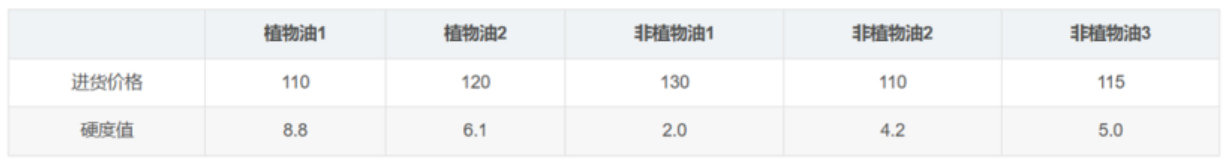

每个月能够**提炼的植物油不超过 200 吨**，**非植物油不超过 250 吨**，假设提炼过程中油料没有损失，提炼费用忽略不计，并且最终的**产品的硬度需要在(3-6)之间** (假设硬度的混合是线性的)。根据以上信息，请你为加工厂指定月采购和加工计划。

最大化利润

设月采购植物油 1，植物油 2，非植物油 1，非植物油 2，非植物油 3 的数量分别为 $x_1, x_2,x_3, x_4,x_5$

$\max~~ 150(x_1+x_2+x_3+ x_4+x_5)-110x_1-120x_2-130x_3-110x_4-116x_5$

满足：

$\begin{cases}x_1+x_2\leq200\\
x_3+x_4+x_5\leq250\\
3\leq\frac{8.8x_1+6.1x_2+2x_3+ 4.2x_4+5x_5}{x_1+x_2+x_3+ x_4+x_5}\leq6\\
x_i\geq0,~~i=1,2,3,4,5\end{cases}$


### 使用 scipy.optimize.linprog 求解

转成 scipy.optimize.linprog 要求的形式：

$ \min~~ -40x_1-30x_2-20x_3- 40x_4-34x_5$

满足：

$\begin{cases}x_1+x_2\leq200\\
x_3+x_4+x_5\leq250\\
-5.8x_1-3.1x_2+x_3- 1.2x_4-2x_5\leq0\\
2.8x_1+0.1x_2-4x_3-1.8x_4-x_5\leq0\\
x_i\geq0,~~i=1,2,3,4,5\end{cases}$

In [ ]:
from scipy.optimize import linprog

c = [-40, -30, -20, -40, -34] # 目标函数的参数系数
A = [[1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [-5.8, -3.1, 1, -1.2, -2],
    [2.8, 0.1, -4, -1.8, -1]]  #   约束不等式的参数系数
b = [200, 250, 0, 0]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*5 )
print("目标的最小值：", res.fun)
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： -17592.59259259259
最优解 x = [159.25925926  40.74074074   0.         250.           0.        ]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


最大化利润的采购计划为：

月采购植物油 1，植物油 2， 非植物油 2 的数量约为  159.25 吨， 40.74 吨， 250 吨。

可获得最大利润约 17592.59 英镑/月。

### 使用 PuLP 求解 〔类似于 官方示例——猫粮配比问题〕

最大化利润

设月采购植物油 1，植物油 2，非植物油 1，非植物油 2，非植物油 3 的数量分别为 $x_1, x_2,x_3, x_4,x_5$

$\max~~ 150(x_1+x_2+x_3+ x_4+x_5)-110x_1-120x_2-130x_3-110x_4-116x_5$

满足：

$\begin{cases}x_1+x_2\leq200\\
x_3+x_4+x_5\leq250\\
3\leq\frac{8.8x_1+6.1x_2+2x_3+ 4.2x_4+5x_5}{x_1+x_2+x_3+ x_4+x_5}\leq6\\
x_i\geq0,~~i=1,2,3,4,5\end{cases}$

经整理得：

满足：

$\begin{cases}x_1+x_2\leq200\\
x_3+x_4+x_5\leq250\\
5.8x_1+3.1x_2-x_3+ 1.2x_4+2x_5\geq0\\
2.8x_1+0.1x_2-4x_3-1.8x_4-x_5\leq0\\
x_i\geq0,~~i=1,2,3,4,5\end{cases}$

In [ ]:
from pulp import *

######### 1、创建变量名称列表 以及 相关的参数字典  #########

# Creates a list of the Ingredients
Ingredients = ["植物油 1", "植物油 2", "非植物油 1", "非植物油 2", "非植物油 3"]

# A dictionary of the costs of each of the Ingredients is created
costs = {
    "植物油 1": 110,
    "植物油 2": 120,
    "非植物油 1": 130,
    "非植物油 2": 110,
    "非植物油 3": 115
}

# A dictionary of the protein percent in each of the Ingredients is created
hardness = {
    "植物油 1": 8.8,
    "植物油 2": 6.1,
    "非植物油 1": 2.0,
    "非植物油 2": 4.2,
    "非植物油 3": 5.0
}


######### 2、创建 prob 问题 并添加目标函数及约束 #########

prob = LpProblem("油加工的月采购问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

ingredient_vars = LpVariable.dicts("原料", Ingredients, 0)

# 添加 目标函数
prob += (
    lpSum([150 * ingredient_vars[i] - costs[i] * ingredient_vars[i] for i in Ingredients]),
    "加工获得每吨油的收益",
)

# 添加 约束
prob += lpSum([ingredient_vars[i] for i in Ingredients[:2]]) <= 200, "植物油总和"
prob += lpSum([ingredient_vars[i] for i in Ingredients[2:]]) <= 250, "非植物油总和"
c1 = {
    "植物油 1": 5.8,
    "植物油 2": 3.1,
    "非植物油 1": -1,
    "非植物油 2": 1.2,
    "非植物油 3": 2
}
prob += lpSum([c1[i] * ingredient_vars[i] for i in Ingredients]) >= 0, "硬度 下限"
c2 = {
    "植物油 1": 2.8,
    "植物油 2": 0.1,
    "非植物油 1": -4,
    "非植物油 2": -1.8,
    "非植物油 3": -1
}
prob += lpSum([c2[i] * ingredient_vars[i] for i in Ingredients]) <= 0, "硬度 上限"

######### 3、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)
# x = []
# for v in prob.variables():
#     x.append(v.varValue)
# print("优化的参数值 x =",x)

print("加工获得每吨油的最大收益 = ", value(prob.objective))
# print(f"加工获得每吨油的最大收益 = {value(prob.objective):.2f}")  # 保留两位小数

求解状态: Optimal
原料_植物油_1 = 159.25926
原料_植物油_2 = 40.740741
原料_非植物油_1 = 0.0
原料_非植物油_2 = 250.0
原料_非植物油_3 = 0.0
加工获得每吨油的最大收益 =  17592.59263


##  —— 补充 PuLP 文档整理 1

https://coin-or.github.io/pulp/main/index.html

###  Quickstart

https://coin-or.github.io/pulp/main/includeme.html#quickstart

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 53.4 MB/s eta 0:00:00


In [ ]:
# 创建变量 0 ≤ x ≤ 3
from pulp import *
x = LpVariable("x", 0, 3)  # 名称 下界 上界

# 创建二进制变量
y = LpVariable("y", cat="Binary")

In [ ]:
# 使用 LpProblem 创建新问题
prob = LpProblem("myProblem", LpMinimize)

# 组合变量以创建表达式和约束，然后将它们添加到问题中。
prob += x + y <= 2

# 没有右侧，认为是 目标
prob += -4*x + y

In [ ]:
# 使用默认包含的求解器解决问题：
status = prob.solve()

# 其它求解器
status = prob.solve(GLPK(msg = 0))

In [ ]:
# 求解状态
LpStatus[status]

# 获取变量值
value(x)

###  示例：猫粮的原料配比方案 〔 满足营养标准的同时降成本 〕

https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html

尽可能便宜地生产猫粮，同时确保它们符合罐头上所列的营养分析要求。

在满足营养标准的同时，改变每种成分的用量（主要成分是鸡肉、牛肉、羊肉、大米、小麦和凝胶）。

鸡肉、牛肉和羊肉的成本分别为 0.013 美元、0.008 美元和 0.010 美元，而大米、小麦和凝胶的成本分别为 0.002 美元、0.005 美元和 0.001 美元。（所有费用均按克计算。）



每种成分对最终产品中蛋白质、脂肪、纤维和盐的总重量都有贡献。下表给出了**每克成分的贡献**（以克为单位）。

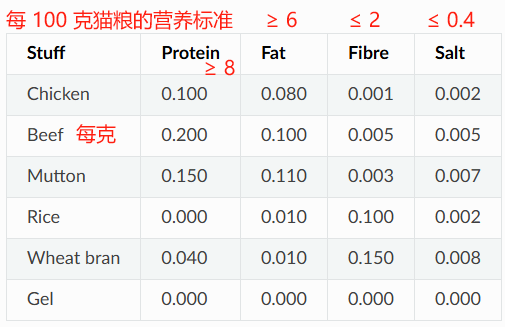

####  简化版建模

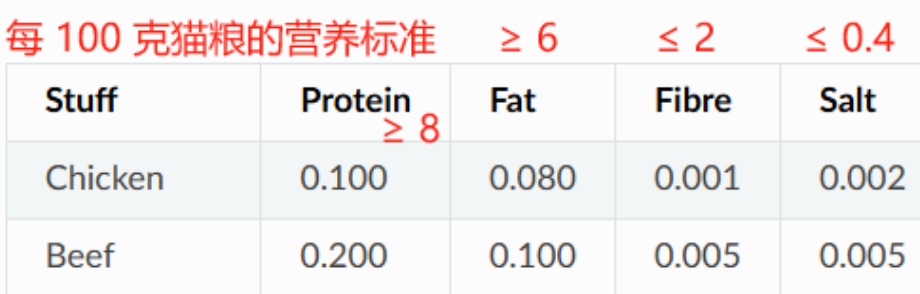

假设 只用 $x_1$ 克鸡肉  和 $x_2$ 克牛肉制作 100 克猫粮


$\min~~0.013x_1+0.008x_2$

满足：

$\begin{cases}x_1+x_2=100\\
0.1x_1+0.2x_2\geq8\\
0.08x_1+0.1x_2\geq6\\
0.001x_1+0.005x_2\leq2\\
0.002x_1+0.005x_2\leq0.4\end{cases}$


In [ ]:
!pip install pulp

In [ ]:
from pulp import *

prob = LpProblem("猫粮匹配问题", LpMinimize)  # 最大化问题时为 LpMaximize

问题变量 $x_1$ 和 $x_2$ 是使用 LpVariable 类创建的。

它有四个参数，第一个是变量的任意**名称**，第二个是变量的**下界**，第三个是**上界**，第四个是**数据的类型**（离散或连续）。第四个参数的选项是 LpContinuous 或 LpInteger，默认为 LpContinuous。如果我们对要生产的罐头数量进行建模，我们将需要输入 LpInteger，因为它是离散数据。

In [ ]:
x1 = LpVariable("鸡肉克数", 0, None, LpInteger)
x2 = LpVariable("牛肉克数", 0)

In [ ]:
# 增加 目标函数
prob += 0.013 * x1 + 0.008 * x2, "每罐猫粮 (100 克)原料的总成本"

In [ ]:
# 添加约束

prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100 * x1 + 0.200 * x2 >= 8.0, "ProteinRequirement"
prob += 0.080 * x1 + 0.100 * x2 >= 6.0, "FatRequirement"
prob += 0.001 * x1 + 0.005 * x2 <= 2.0, "FibreRequirement"
prob += 0.002 * x1 + 0.005 * x2 <= 0.4, "SaltRequirement"

In [ ]:
prob.solve()

1

In [ ]:
# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.

print("求解状态:", LpStatus[prob.status])

求解状态: Optimal


In [ ]:
# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

牛肉克数 = 66.0
鸡肉克数 = 34.0


In [ ]:
#
print("每罐猫粮 (100 克)原料的最低总成本 = ", value(prob.objective))

每罐猫粮 (100 克)原料的最低总成本 =  0.97


####  完整版建模

假设 制作 100 克猫粮使用 鸡肉、牛肉、羊肉、大米、小麦和凝胶 的克数分别为 $x_1, x_2, x_3,x_4,x_5,x_6$


$\min~~0.013x_1+0.008x_2+0.002x_4+0.005x_5+0.001x_6$

满足：

$\begin{cases}x_1+x_2+x_3+x_4+x_5+x_6=100\\
0.1x_1+0.2x_2+0.15x_3+0.04x_5\geq8\\
0.08x_1+0.1x_2+0.11x_3+0.01x_4+0.01x_5\geq6\\
0.001x_1+0.005x_2+0.003x_3+0.1x_4+0.15x_5\leq2\\
0.002x_1+0.005x_2+0.007x_3+0.002x_4+0.008x_5\leq0.4\end{cases}$

In [ ]:
from pulp import *

######### 1、创建变量名称列表 以及 相关的参数字典  #########

# Creates a list of the Ingredients
Ingredients = ["CHICKEN", "BEEF", "MUTTON", "RICE", "WHEAT", "GEL"]

# A dictionary of the costs of each of the Ingredients is created
costs = {
    "CHICKEN": 0.013,
    "BEEF": 0.008,
    "MUTTON": 0.010,
    "RICE": 0.002,
    "WHEAT": 0.005,
    "GEL": 0.001,
}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {
    "CHICKEN": 0.100,
    "BEEF": 0.200,
    "MUTTON": 0.150,
    "RICE": 0.000,
    "WHEAT": 0.040,
    "GEL": 0.000,
}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {
    "CHICKEN": 0.080,
    "BEEF": 0.100,
    "MUTTON": 0.110,
    "RICE": 0.010,
    "WHEAT": 0.010,
    "GEL": 0.000,
}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {
    "CHICKEN": 0.001,
    "BEEF": 0.005,
    "MUTTON": 0.003,
    "RICE": 0.100,
    "WHEAT": 0.150,
    "GEL": 0.000,
}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {
    "CHICKEN": 0.002,
    "BEEF": 0.005,
    "MUTTON": 0.007,
    "RICE": 0.002,
    "WHEAT": 0.008,
    "GEL": 0.000,
}


######### 2、创建 prob 问题 并添加目标函数及约束 #########

prob = LpProblem("制作猫粮的原料配比问题", LpMinimize)  # 最大化问题时为 LpMaximize

ingredient_vars = LpVariable.dicts("Ingr", Ingredients, 0)

# 目标函数
prob += (
    lpSum([costs[i] * ingredient_vars[i] for i in Ingredients]),
    "Total Cost of Ingredients per can",
)

# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += (
    lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0,
    "ProteinRequirement",
)
prob += (
    lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0,
    "FatRequirement",
)
prob += (
    lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0,
    "FibreRequirement",
)
prob += (
    lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4,
    "SaltRequirement",
)


######### 3、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)
# x = []
# for v in prob.variables():
#     x.append(v.varValue)
# print("优化的参数值 x =",x)

print("每罐猫粮 (100 克)原料的最低总成本 = ", value(prob.objective))

求解状态: Optimal
Ingr_BEEF = 60.0
Ingr_CHICKEN = 0.0
Ingr_GEL = 40.0
Ingr_MUTTON = 0.0
Ingr_RICE = 0.0
Ingr_WHEAT = 0.0
每罐猫粮 (100 克)原料的最低总成本 =  0.52


最佳的解决方案是 60% 的牛肉和 40% 的凝胶，目标函数最小值为每罐
 52 美分。


##  引例： PuLP 求解优化问题  

求解这样一个问题：

$\max~~  2x_1 + 3x_2 + x_3$

满足：

$\begin{cases}x_1 + 2x_2 + 4x_3 = 101\\
x_1 + 4x_2 + 2x_3 \geq 8\\
3x_1 + 2x_2 \geq 6\\
x_{i} \geq 0, \quad i=1,2,3 \end{cases}$

In [ ]:
!pip install pulp

In [ ]:
from pulp import *

prob = LpProblem("约束包含等式的优化问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)
x3 = LpVariable("x3", 0)

# 增加 目标函数
prob += 2 * x1 + 3 * x2 + x3

# 添加约束

prob += x1 + 2 * x2 + 4 * x3 == 101
prob += x1 + 4 * x2 + 2 * x3 >= 8
prob += 3 * x1 + 2 * x2 >= 6

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

#
print("目标最大值 = ", value(prob.objective))

求解状态: Optimal
x1 = 101.0
x2 = 0.0
x3 = 0.0
目标最大值 =  202.0


### 用 scipy.optimize.linprog 求解 〔结果一致 〕

转成 scipy.optimize.linprog  要求的形式

$\min~~  -2x_1 - 3x_2 - x_3$

满足：

$\begin{cases}x_1 + 2x_2 + 4x_3 = 101\\
-x_1 - 4x_2 - 2x_3 \leq -8\\
-3x_1 - 2x_2 \leq -6\\
x_{i} \geq 0, \quad i=1,2,3 \end{cases}$

In [ ]:
from scipy.optimize import linprog

c = [-2, -3, -1] # 目标函数的参数系数
A = [[1, 2, 4],
    [-1, -4, -2],
    [-3, -2, 0]]  #   约束不等式的参数系数
b = [101, -8, -6]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*3 )
print("目标的最小值：", res.fun)
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： -202.0
最优解 x = [101.   0.   0.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


##   —— 补充 PuLP 文档整理 2  示例：运送问题

https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html

### 例： 2 个仓库给 5 个酒吧配送啤酒

**问题描述：**

一家精品啤酒厂有 **2 个仓库**，从那里向 **5 家**精心挑选的**酒吧分销啤酒**。在每周开始的时候，每个酒吧都会向啤酒厂的总部发出订单，订购这么多箱啤酒，然后这些啤酒会从相应的仓库送到酒吧。啤酒厂希望有一个交互式的计算机程序，他们可以每周运行，告诉他们**哪个仓库应该供应哪个酒吧**，以尽量**减少**整个**运营的成本**。

例如，假设在给定的一周开始时，啤酒厂在仓库  A  有 1000 箱，在仓库 B 有 4000 箱，酒吧分别需要 500 箱、900 箱、1800 箱、200 箱和 700 箱。哪个仓库供应哪个酒吧？







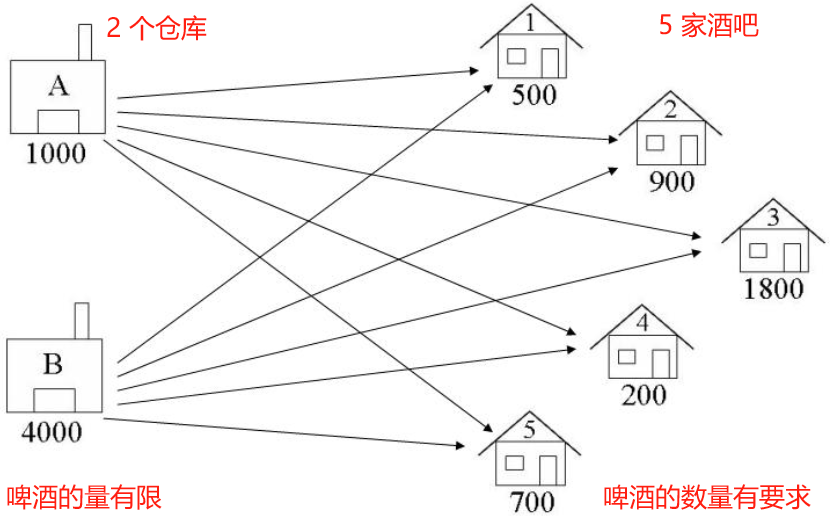

参数定义：

Ai = 从仓库 A 运到酒吧 i 的啤酒箱数

Bi = 从仓库 B 运到酒吧 i 的啤酒箱数

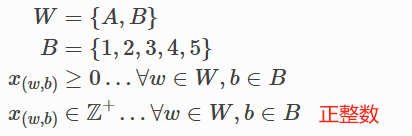

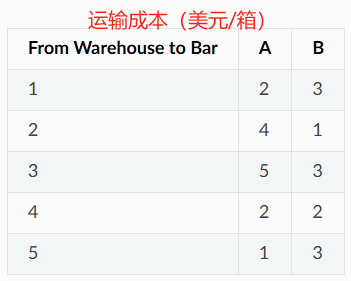

目标：

$\min \sum\limits_{w~\in~ W, ~b~\in~ B}c_{(w,b)}x_{(w, b)}$

满足：

库房这边 〔**供应**约束〕：

$\begin{cases}A1 + A2 + A3 + A4 + A5 <= 1000\\
B1 + B2 + B3 + B4 + B5 <= 4000\\
\sum\limits_{b~\in~B}x_{(w,b)}\leq s_w ~~~\forall~w\in W
\end{cases}$

酒吧那边 〔**需求**约束〕：

$\begin{cases}A1 + B1 >= 500\\
A2 + B2 >= 900\\
A3 + B3 >= 1800\\
A4 + B4 >= 200\\
A5 + B5 >= 700\\
\sum\limits_{b~\in~B}x_{(w,b)}\geq d_b ~~~\forall~b\in B
\end{cases}$

In [ ]:
"""
用 PuLP 求解 啤酒配送问题
作者： 姓名，时间
"""
from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########
# Creates a list of all the supply nodes
Warehouses = ["A", "B"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000, "B": 4000}

# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "1": 500,
    "2": 900,
    "3": 1800,
    "4": 200,
    "5": 700,
}

######### 2、将成本数据输入到一个列表中 #########
# Creates a list of costs of each transportation path
costs = [  # Bars
    # 1 2 3 4 5
    [2, 4, 5, 2, 1],  # A   Warehouses
    [3, 1, 3, 2, 3],  # B
]

# The cost data is made into a dictionary
costs = makeDict([Warehouses, Bars], costs, 0)
# costs[“A”][“1”]： 从仓库 A 到 酒吧 1 的成本
# costs[“C”][“2”]  0 默认为 0

######### 3、LpProblem 函数创建 prob 变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem", LpMinimize)

# 创建包含 所有可能的传输路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Warehouses for b in Bars]

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Bars), 0, None, LpInteger)

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[w][b] * costs[w][b] for (w, b) in Routes]),
    "Sum_of_Transporting_Costs",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += (
        lpSum([vars[w][b] for b in Bars]) <= supply[w],
        f"Sum_of_Products_out_of_Warehouse_{w}",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += (
        lpSum([vars[w][b] for w in Warehouses]) >= demand[b],
        f"Sum_of_Products_into_Bar{b}",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("最低的运输成本 = ", value(prob.objective))

求解状态: Optimal
Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0
最低的运输成本 =  8600.0


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


#### 扩展

<font size=4>**情形 1： 供大于求** 〔 上述示例的情形 〕

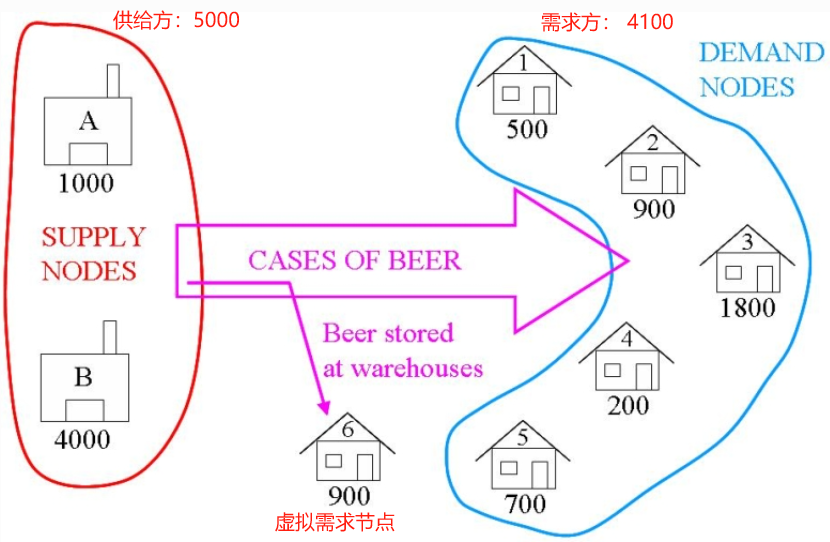

In [ ]:
# 修改： 添加虚拟需求节点 D

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000, "B": 4000}

# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5", "D"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1": 500, "2": 900, "3": 1800, "4": 200, "5": 700, "D": 900}

# Creates a list of costs of each transportation path
costs = [  # Bars
    # 1 2 3 4 5 D
    [2, 4, 5, 2, 1, 0],  # A   Warehouses
    [3, 1, 3, 2, 3, 0],  # B
]

<font size=4>**情形 2： 供小于求**

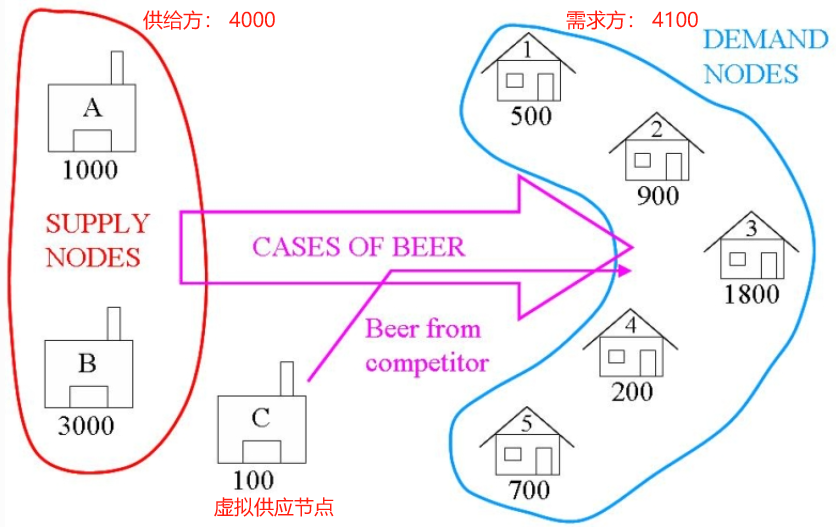

In [ ]:
# 修改： 添加虚拟供应节点 C

# Creates a list of all the supply nodes
Warehouses = ["A", "B", "C"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000, "B": 4000, "C": 100}

# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "1": 500,
    "2": 900,
    "3": 1800,
    "4": 200,
    "5": 700,
}

# Creates a list of costs of each transportation path
costs = [  # Bars
    # 1 2 3 4 5
    [2, 4, 5, 2, 1],  # A   Warehouses
    [3, 1, 3, 2, 3],  # B
    [0, 0, 0, 0, 0],
]

##   例 3.6 农产品种植计划 〔 类似于配送问题 〕

**例 3.6** $~~$一个农民承包了 6 块耕地**共 300 亩**，准备播种**小麦、玉米、水果和蔬菜**四种农产品，各种农产品的计划播种面积、每块土地种植不同农产品的单产收益如下表：

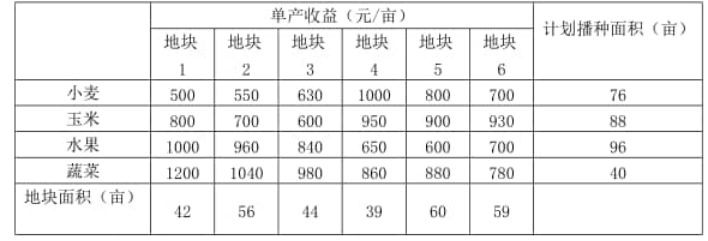

问如何安排种植计划，可得到最大收益。

参数定义：

农作物 Crops： C = ["小麦", "玉米", "水果", "蔬菜"]

耕地 Arable lands： A = ["1", "2", "3", "4", "5", "6"]

profits["小麦"]["1"]： 小麦种在地块 1 的单位收益

In [ ]:
"""
用 PuLP 获取 农作物种植计划
作者： 姓名，时间
"""
from pulp import *

######### 1、给相关节点命名，以节点名称为键， 相关参数为值创建字典 #########

### 方便命名的一方 或 供应方
# Creates a list of all the supply nodes
Crops = ["小麦", "玉米", "水果", "蔬菜"]

# Creates a dictionary for the number of units of supply for each supply node
needs = {"小麦":76, "玉米":88, "水果":96, "蔬菜":40}

### 数字命名的 或 需求方
# Creates a list of all demand nodes
Arable_lands = ["1", "2", "3", "4", "5", "6"]

# Creates a dictionary for the number of units of demand for each demand node
areas = {
    "1": 42,
    "2": 56,
    "3": 44,
    "4": 39,
    "5": 60,
    "6": 59
}

######### 2、将利润数据输入到一个列表中 #########
profits = [  # 地块
    # 1 2 3 4 5 6
    [500, 550, 630, 1000, 800, 700],  # A   农作物
    [800, 700, 600, 950, 900, 930],  # B
    [1000, 960, 840, 650, 600, 700],  # C
    [1200, 1040, 980, 860, 880, 780],  # D
]

# The profit data is made into a dictionary
profits = makeDict([Crops, Arable_lands], profits, 0)
# profits[“小麦”][“1”]：  小麦在地块 i 种植的单产收益


######### 3、LpProblem 函数创建 prob  变量 并求解 #########
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("农作物种植问题", LpMaximize)  # 最小化问题时为 LpMinimize   # 最大化问题时为 LpMaximize

# 创建包含 所有可能的种植路径 的元组列表
# Creates a list of tuples containing all the possible routes for transport
Routes = [(c, a) for c in Crops for a in Arable_lands]
# print(Routes)

# 创建 包含 LP 变量， 名为 vars 的字典
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Crops, Arable_lands), 0, None, LpInteger)  # 要求是整数吗?

# 添加目标函数
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[c][a] * profits[c][a] for (c, a) in Routes]),
    "种植收益之和",
)

# 添加约束
# The supply maximum constraints are added to prob for each supply node (warehouse)
for c in Crops:
    prob += (
        lpSum([vars[c][a] for a in Arable_lands]) <= needs[c],
        f"种植 {c} 的亩数",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for a in Arable_lands:
    prob += (
        lpSum([vars[c][a] for c in Crops]) <= areas[a],
        f"地块 {a} 种植农作物的亩数",
    )

######### 4、求解并打印相关结果  #########

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

print(f"种植农作物的最大收益 = {value(prob.objective):.2f}")

求解状态: Optimal
Route_小麦_1 = 0.0
Route_小麦_2 = 0.0
Route_小麦_3 = 6.0
Route_小麦_4 = 39.0
Route_小麦_5 = 31.0
Route_小麦_6 = 0.0
Route_水果_1 = 2.0
Route_水果_2 = 56.0
Route_水果_3 = 38.0
Route_水果_4 = 0.0
Route_水果_5 = 0.0
Route_水果_6 = 0.0
Route_玉米_1 = 0.0
Route_玉米_2 = 0.0
Route_玉米_3 = 0.0
Route_玉米_4 = 0.0
Route_玉米_5 = 29.0
Route_玉米_6 = 59.0
Route_蔬菜_1 = 40.0
Route_蔬菜_2 = 0.0
Route_蔬菜_3 = 0.0
Route_蔬菜_4 = 0.0
Route_蔬菜_5 = 0.0
Route_蔬菜_6 = 0.0
种植农作物的最大收益 = 284230.00
